# Plotting directly with `matplotlib`

## Setup

### Importing Required Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os

%matplotlib inline

In [2]:
plt.style.use("ggplot")
print("matplotlib version: ", mpl.__version__)

matplotlib version:  3.10.5


### Importing the dataset

In [3]:
# dir_path = os.path.join(".", "data")
# os.makedirs(dir_path, exist_ok=True)
#
# def download_file(url: str) -> str:
#     import requests
#     with requests.get(url=url, stream=True) as response:
#         response.raise_for_status()
#
#         filepath = os.path.join(dir_path, url.rsplit("/", 1)[-1])
#         total_size = int(response.headers.get("Content-Length", 0))
#         chunk_size = 1024 ** 2
#         download_size = 0
#
#         with open(filepath, "wb") as file:
#             for chunk in response.iter_content(chunk_size=chunk_size):
#                 if not chunk:
#                     continue
#
#                 file.write(chunk)
#                 download_size += len(chunk)
#
#                 if total_size > 0:
#                     progress = (download_size / total_size) * 100
#                     print(f"Downloading: {progress:.2f}% ({download_size} / {total_size} bytes)")
#
#     print("Download Complete.")
#     return filepath

In [4]:
# data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"
# filename = download_file(data_url)

# The steps are simplified because this file is shared with the before-learned section of this module, and the latter is updated first
filename = os.path.join(".", "data", "Canada.csv")

In [5]:
df = pd.read_csv(filename)

<p>Let's take a look at the first five items in our dataset.</p>

In [6]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


<p>Let's find out how many entries there are in our dataset.</p>

In [7]:
df.shape

(195, 39)

<p>Set the country name as index - useful for quickly looking up countries using <code>loc()</code> method.</p>

In [8]:
df = df.set_index("Country")
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


<p>Let's create a list of years from 1980 to 2013.</p>

In [9]:
def year_list(a: int, b: int) -> list[str]:
    return list(map(str, range(a, b)))

years = year_list(1980, 2014)

## Line Plot

<p>A line plot displays the relationship between two continuous variables over a continuous interval, showing the trend or pattern of the data.</p>
<p>Let's created a line plot to visualize the immigrants (to Canada) trend during 1980 to 2013. We need the Total of year-wise immigrants.</p>
<p>We will create a new dataframe for only columns containing the years. Then, we will apply <code>sum()</code> on the dataframe.</p>
<p>You can do create a line plot directly on <code>axes</code> by calling plot function <code>plot()</code>.</p>

In [10]:
df_line = df.loc[:, years]
total_immigrants = df_line.sum()
total_immigrants

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

Text(0.5, 0, 'Years')

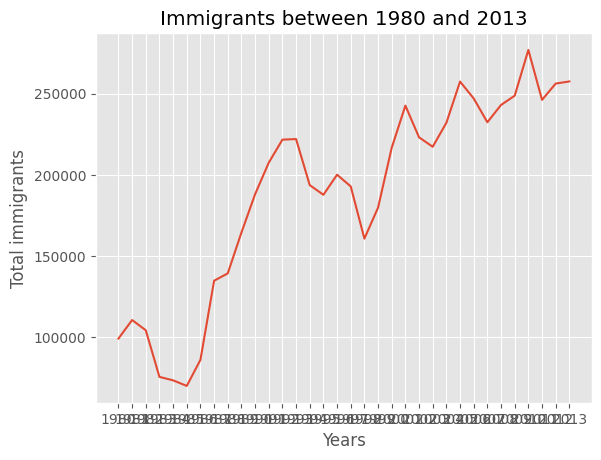

In [11]:
fig, ax = plt.subplots()

ax.plot(total_immigrants)

ax.set_title("Immigrants between 1980 and 2013")
ax.set_ylabel("Total immigrants")
ax.set_xlabel("Years")

<p>The plot function populated the x-axis with the index values (years), and the y-axis with the column values (population).</p>
<p>However, notice how the years were not displayed because they are of type string.</p>
<p>Therefore, let's change the type of the index values to integer for plotting.</p>

Text(0.5, 0, 'Years')

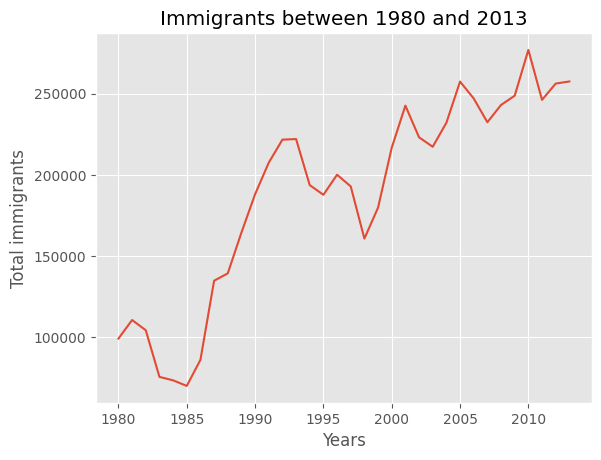

In [12]:
total_immigrants.index = total_immigrants.index.map(int)

fig, ax = plt.subplots()
ax.plot(total_immigrants)

ax.set_title("Immigrants between 1980 and 2013")
ax.set_ylabel("Total immigrants")
ax.set_xlabel("Years")

<p>Let's now customize the above plot's appearance.</p>

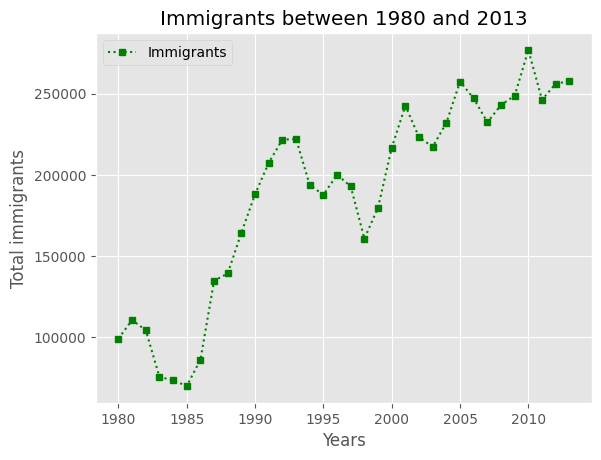

In [13]:
fig, ax = plt.subplots()
ax.plot(total_immigrants, marker="s", markersize=5, color="green", linestyle="dotted")

ax.set_title("Immigrants between 1980 and 2013")
ax.set_ylabel("Total immigrants")
ax.set_xlabel("Years")
ax.legend(["Immigrants"])

<p>Let's include the background grid, a legend and try to change the limits on the axis.</p>

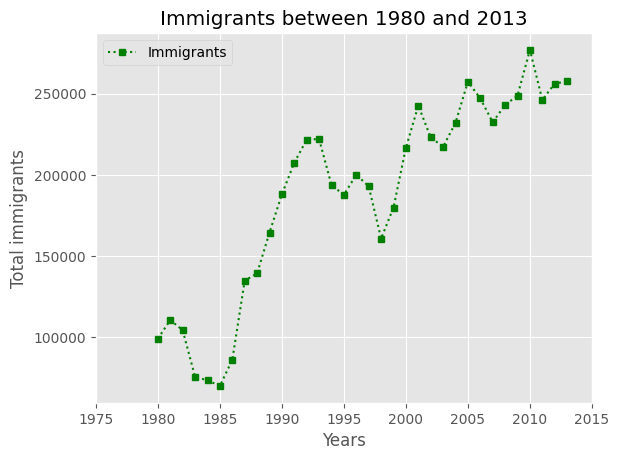

In [14]:
fig, ax = plt.subplots()

ax.plot(total_immigrants, marker="s", markersize=5, color="green", linestyle="dotted")

ax.set_title("Immigrants between 1980 and 2013")
ax.set_ylabel("Total immigrants")
ax.set_xlabel("Years")

ax.legend(["Immigrants"])
ax.set_xlim(1975, 2015)
ax.grid(True)

### Let's start with a case study

<p>In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot.</p>

<p><b>Question:</b> Plot a line graph of immigration from Haiti</p>
<p>You are required to create a dataframe where the name of the <code>Country</code> is equal to <code>Haiti</code> and years from 1980 to 2013. Also, you will be required to transpose the new dataframe into a Series for plotting. Might also have to change the type of index of the series to integer for a better look of the plot. Then, create <code>fig</code> and <code>ax</code> and call function <code>plot()</code> on the data.</p>

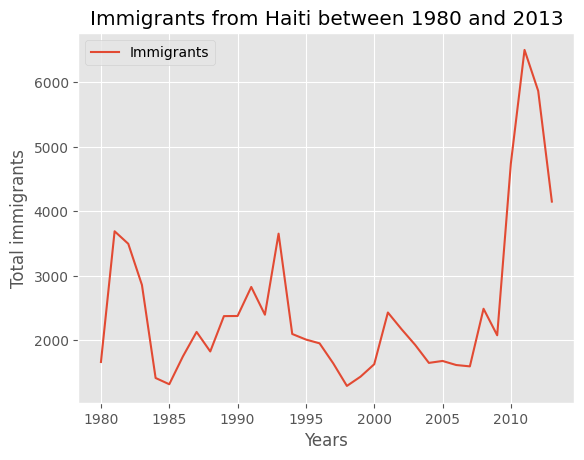

In [15]:
haiti = df.loc["Haiti"]

haiti = haiti[years].T
haiti.index = haiti.index.map(int)

fig, ax = plt.subplots()
ax.plot(haiti)

ax.set_title("Immigrants from Haiti between 1980 and 2013")
ax.set_ylabel("Total immigrants")
ax.set_xlabel("Years")

ax.legend(["Immigrants"])
ax.grid(True)

<p>We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti.</p>
<p>Let's annotate this spike in the plot by using the <code>ax.annotate()</code> method.</p>

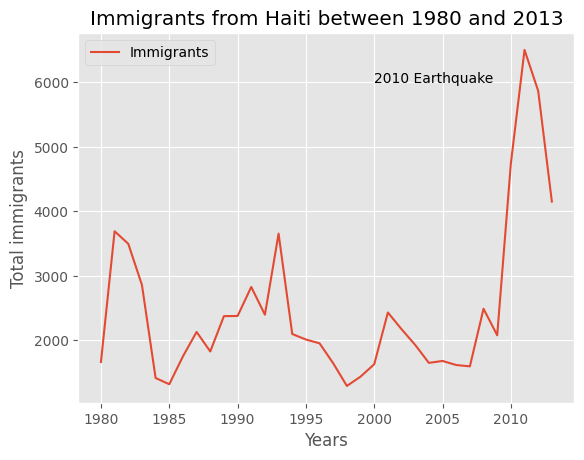

In [16]:
fig, ax = plt.subplots()
ax. plot(haiti)

ax.set_title("Immigrants from Haiti between 1980 and 2013")
ax.set_ylabel("Total immigrants")
ax.set_xlabel("Years")

ax.annotate("2010 Earthquake", xy=(2000, 6000))
ax.legend(["Immigrants"])
ax.grid(True)

<p>You can also specify the ticks to be displayed on the plot like this - <code>ax.set_xticks(list(range(1980, 2015, 5)))</code>.</p>

## Scatter Plot

<p>A scatter plot visualizes the relationship between two continuous variables, displaying individual data points as dots on a two-dimensional plane, allowing for the examination of patterns, clusters, and correlations.</p>
<p>Let's created a <b>Scatter plot</b> to visualize the immigrants (to Canada) trend during 1980 to 2013. We need the Total of year-wise immigrants.</p>
<p>We will create a new dataframe for only columns containing the years. Then, we will apply <code>sum()</code> on the dataframe. You can do create a scatter plot directly on <code>ax</code> by calling plot function <code>scatter()</code>.</p>

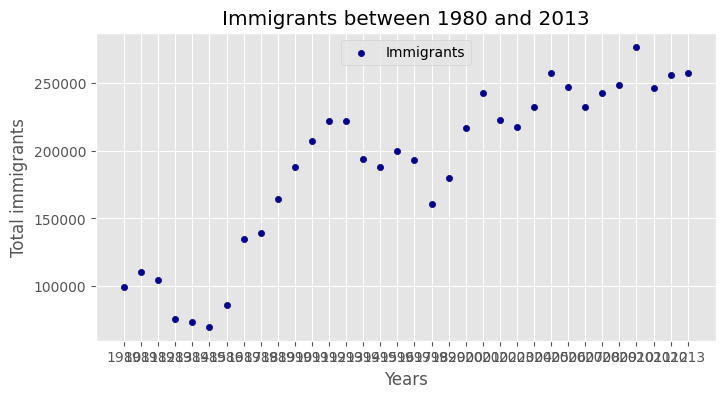

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(years, total_immigrants, marker="o", s=20, color="darkblue")

ax.set_title("Immigrants between 1980 and 2013")
ax.set_ylabel("Total immigrants")
ax.set_xlabel("Years")
ax.legend(["Immigrants"], loc="upper center")
ax.grid(True)

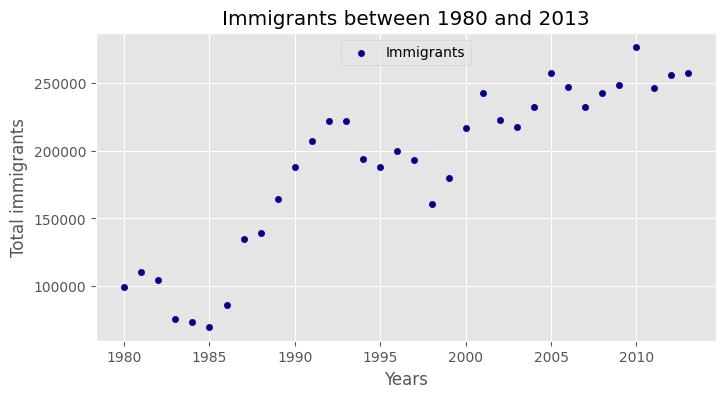

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))

total_immigrants.index = total_immigrants.index.map(int)

ax.scatter(total_immigrants.index, total_immigrants, marker="o", s=20, color="darkblue")

ax.set_title("Immigrants between 1980 and 2013")
ax.set_ylabel("Total immigrants")
ax.set_xlabel("Years")
ax.legend(["Immigrants"], loc="upper center")
ax.grid(True)

<p>Refer to the <a href="https://matplotlib.org/stable/api/markers_api.html">matplotlib documentation</a> and change the marker and its size, color in the above code to see the difference in the appearance of the plot.</p>

## Bar Plot

<p>A bar plot represents categorical data with rectangular bars, where the height of each bar corresponds to the value of a specific category, making it suitable for comparing values across different categories.</p>
<p>Let's create a bar plot to visualize the top 5 countries that contributed the most immigrants to Canada from 1980 to 2013.</p>

<p>Apply <code>sort_values()</code> function on the <code>Total</code> column of our data. We will create a new dataframe for only columns containing the years. Then, we will apply <code>sum()</code> on the dataframe and can create a separate dataframe for top five countries.</p>
<p>You can further use the names of the countries to label each bar on the plot.</p>

In [19]:
df = df.sort_values("Total", ascending=False, axis=0)
df_top5 = df.head()

df_bar_5 = df_top5.reset_index()

label = df_bar_5.loc[: ,"Country"].values.tolist()
label

['India',
 'China',
 'United Kingdom of Great Britain and Northern Ireland',
 'Philippines',
 'Pakistan']

<p>The third name is too lengthy to fit on the x-axis as label. Let's fix this using indexing.</p>

In [20]:
label[2] = "UK"
label

['India', 'China', 'UK', 'Philippines', 'Pakistan']

Text(0.5, 0, 'Years')

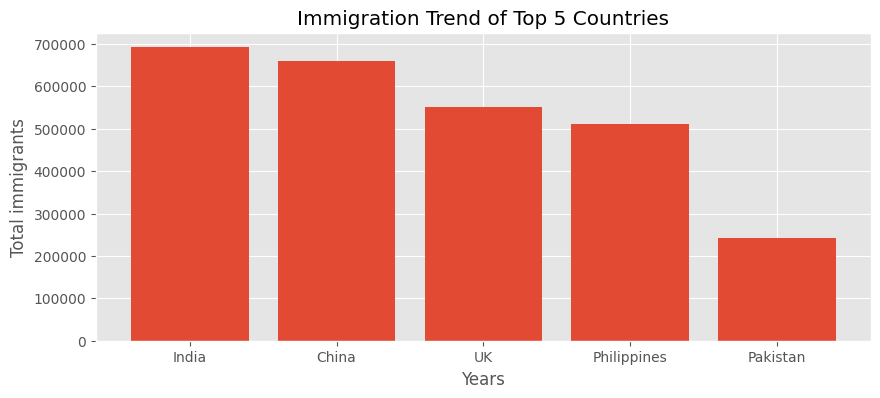

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(label, df_bar_5.loc[:, "Total"], label=label)
ax.set_title("Immigration Trend of Top 5 Countries")
ax.set_ylabel("Total immigrants")
ax.set_xlabel("Years")

<p><b>Question:</b> Create a bar plot of the 5 countries that contributed the <b>least</b> to immigration to Canada from 1980 to 2013.</p>

Text(0.5, 0, 'Years')

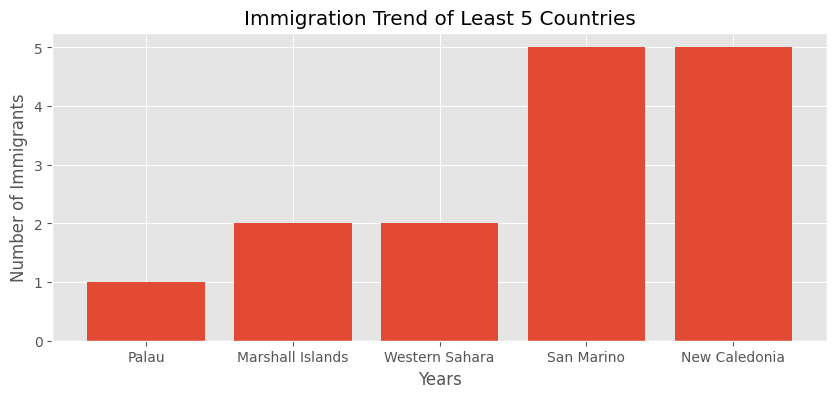

In [22]:
df = df.sort_values("Total", ascending=True, axis=0)

df_least5 = df.head()
df_bar_least5 = df_least5.reset_index()

label = df_bar_least5.loc[: , "Country"].values.tolist()

fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(label, df_bar_least5.loc[:, "Total"], label=label)
ax.set_title("Immigration Trend of Least 5 Countries")
ax.set_ylabel("Number of Immigrants")
ax.set_xlabel("Years")

## Histogram

<p>A histogram is a way of representing the <b>frequency</b> distribution of numeric dataset. The way it works is it partitions the x-axis into <b>bins</b>, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.</p>
<p>Let's find out the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013.</p>

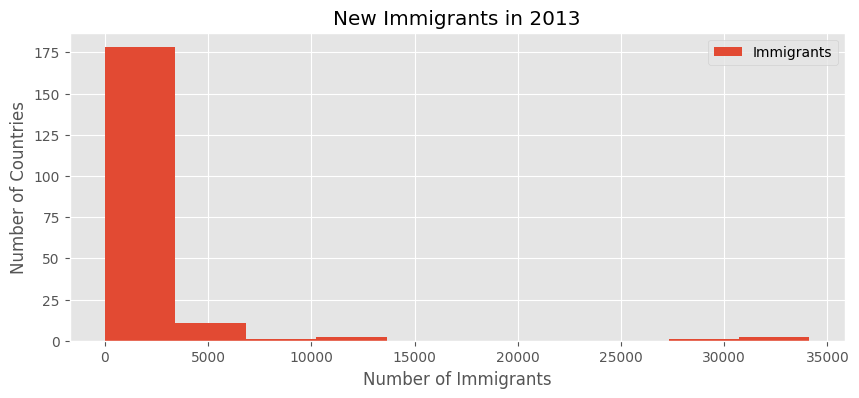

In [23]:
df_country = df.groupby(["Country"])["2013"].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_country["2013"])
ax.set_title("New Immigrants in 2013")
ax.set_xlabel("Number of Immigrants")
ax.set_ylabel("Number of Countries")
ax.legend(["Immigrants"])

<p>Our plot doesnot match with the bars. By default, the <code>histogram()</code> method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013.</p>
<p>The <code>hist()</code> function returns list of arrays with <code>counts</code> and <code>bins</code>. We can fetch that using unpacking functionality and further use the bins as x-ticks.</p>

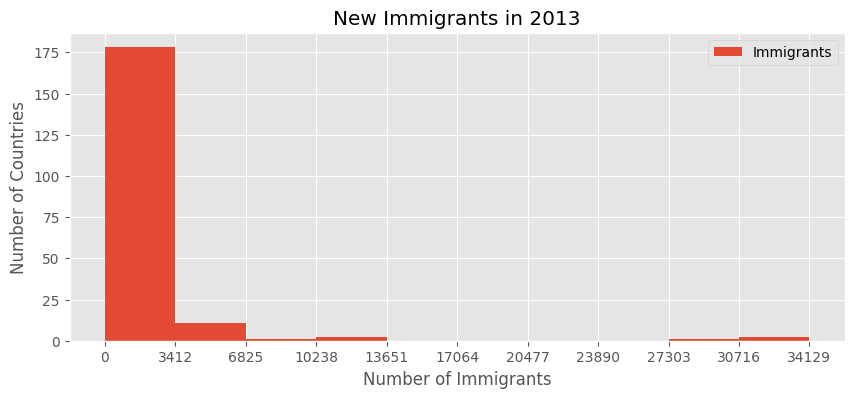

In [24]:
fig, ax = plt.subplots(figsize=(10, 4))
hist_params = ax.hist(df_country["2013"])   # 0 -> counts, 1 -> bins

ax.set_title("New Immigrants in 2013")
ax.set_xlabel("Number of Immigrants")
ax.set_ylabel("Number of Countries")
ax.set_xticks(list(map(int, hist_params[1])))
ax.legend(["Immigrants"])

<p>We can also plot multiple histograms on the same plot. For example, let's try to answer the following question using a histogram.</p>
<p><b>Question:</b> What is the immigration distribution for Denmark, Norway, and Sweden for years 1980-2013?</p>

In [25]:
df_DNS = df.groupby(["Country"])[years].sum()
df_DNS = df.loc[["Denmark", "Norway", "Sweden"], years]
df_DNS = df_DNS.T
df_DNS

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


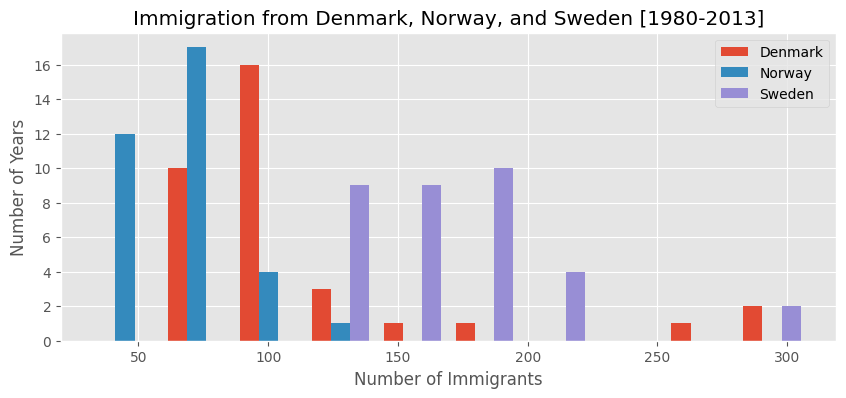

In [26]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_DNS)

ax.set_title("Immigration from Denmark, Norway, and Sweden [1980-2013]")
ax.set_xlabel("Number of Immigrants")
ax.set_ylabel("Number of Years")
ax.legend(["Denmark", "Norway", "Sweden"])

<p><b>Question:</b> What is the immigration distribution for China and India for years 2000-2013?</p>

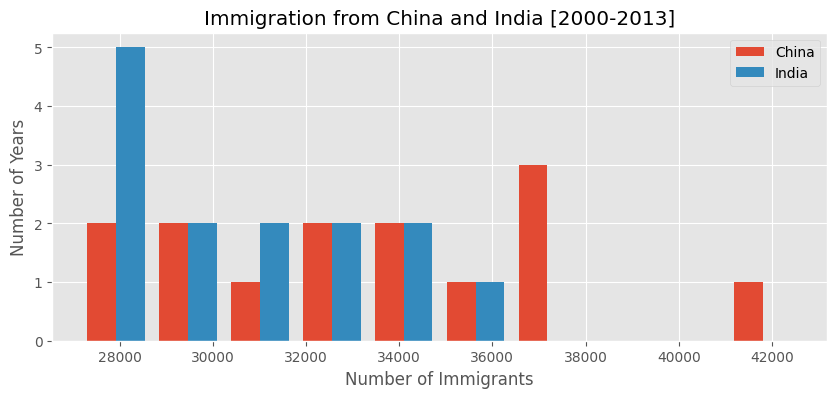

In [27]:
df_CI = df.groupby(["Country"])[years].sum()
years_1 = list(map(str, range(2000, 2014)))

df_CI = df_CI.loc[["China", "India"], years_1]
df_CI = df_CI.T

fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_CI)

ax.set_title("Immigration from China and India [2000-2013]")
ax.set_xlabel("Number of Immigrants")
ax.set_ylabel("Number of Years")
ax.legend(["China", "India"])

## Pie Chart

<p>A pie chart represents the proportion distribution of different categories in a dataset using sectors of a circular pie.</p>
<p>Let's create a pie chart representing the <code>Total Immmigrants</code> for the year 1980-1985.</p>

Text(0.5, 1.0, 'Distribution of Immigrants from 1980 to 1985')

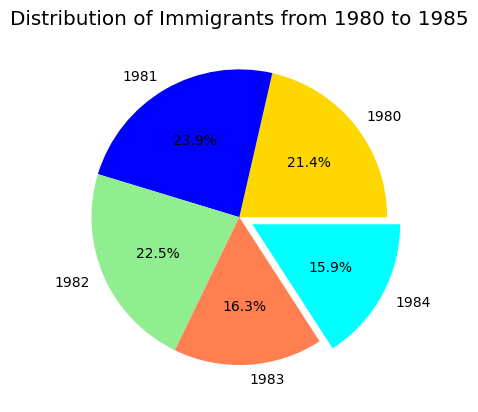

In [28]:
fig, ax = plt.subplots()

ax.pie(total_immigrants[0: 5], labels=years[0: 5], colors=["gold", "blue", "lightgreen", "coral", "cyan"], autopct="%1.1f%%", explode=[0, 0, 0, 0, 0.1])

ax.set_aspect("equal")

ax.set_title("Distribution of Immigrants from 1980 to 1985")

<p><b>Question:</b> Create a pie chart representing the total immigrants proportion for each continent.</p>
<p>First you will have to group the data over continents and get the sum on total. Then, you can pass this data to the <code>pie()</code> function.</p>

In [29]:
df_con = df.groupby(["Continent"])["Total"].sum().reset_index()

label = df_con.loc[:, "Continent"].values.tolist()
label[3] = "LAC"
label[4] = "NA"

df_con

,Continent,Total
0,Africa,618948
1,Asia,3317794
2,Europe,1410947
3,Latin America and the Caribbean,765148
4,Northern America,241142
5,Oceania,55174


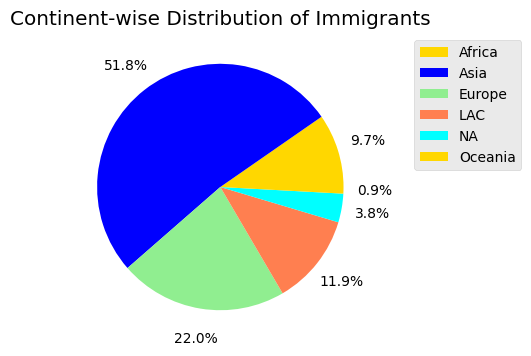

In [30]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.pie(df_con["Total"], autopct="%1.1f%%", colors=["gold", "blue", "lightgreen", "coral", "cyan"], pctdistance=1.25)

ax.set_aspect("equal")
ax.set_title("Continent-wise Distribution of Immigrants")
ax.legend(label, bbox_to_anchor=(1, 0, 0.5, 1))

## Sub-plotting

<p>Let's explore how to display more than one plot on the same figure and specify the number of rows and columns to be created to the <code>subplots()</code> function.</p>
<p>For instance, let's create a line and scatter plot in one row <code>plt.subplots()</code>. You can use the same functions using which you plot line and scatter plots at the start of this lab. Both the subplots will be sharing the same y-axis as the data in the y-axis is the same. So, assign the <code>sharey</code> parameter as <code>True</code> in the code below. Also notice the use of <code>suptitle()</code>.</p>

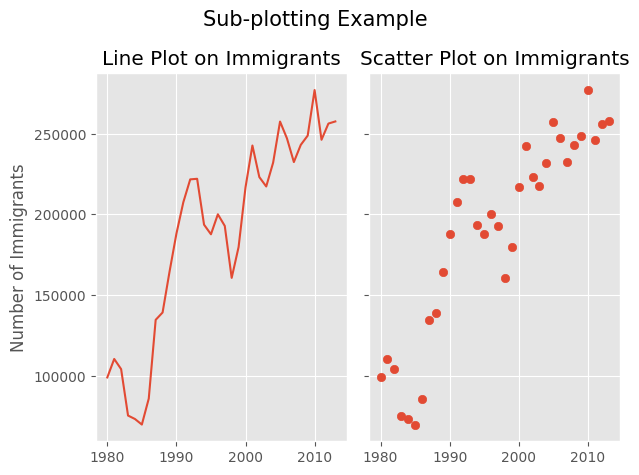

In [31]:
fig, ax = plt.subplots(1, 2, sharey=True)

ax[0].plot(total_immigrants)
ax[0].set_title("Line Plot on Immigrants")
ax[0].set_ylabel("Number of Immigrants")

ax[1].scatter(total_immigrants.index, total_immigrants)
ax[1].set_title("Scatter Plot on Immigrants")

fig.suptitle("Sub-plotting Example", fontsize=15)
fig.tight_layout()

<p>You can also implement the subplotting with <code>add_subplot()</code> as below.</p>

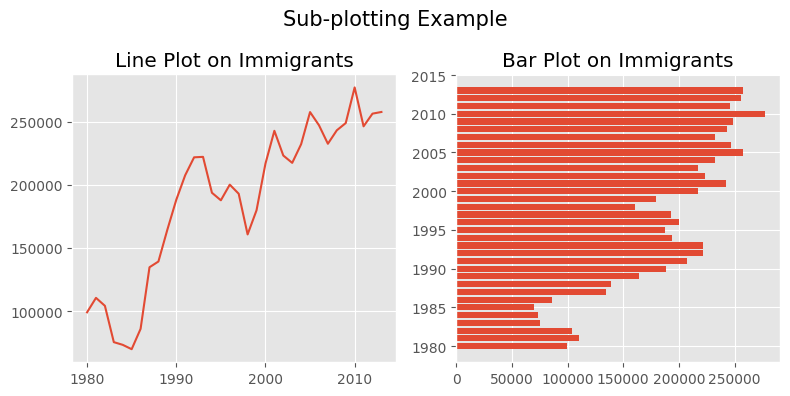

In [32]:
fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(total_immigrants)
ax1.set_title("Line Plot on Immigrants")

ax2 = fig.add_subplot(1, 2, 2)
ax2.barh(total_immigrants.index, total_immigrants)
ax2.set_title("Bar Plot on Immigrants")

fig.suptitle("Sub-plotting Example", fontsize=15)
fig.tight_layout()

<p><b>Question:</b> Choose any four plots, which you have developed in this lab, with sub-plotting display the, in a 2×2 display.</p>

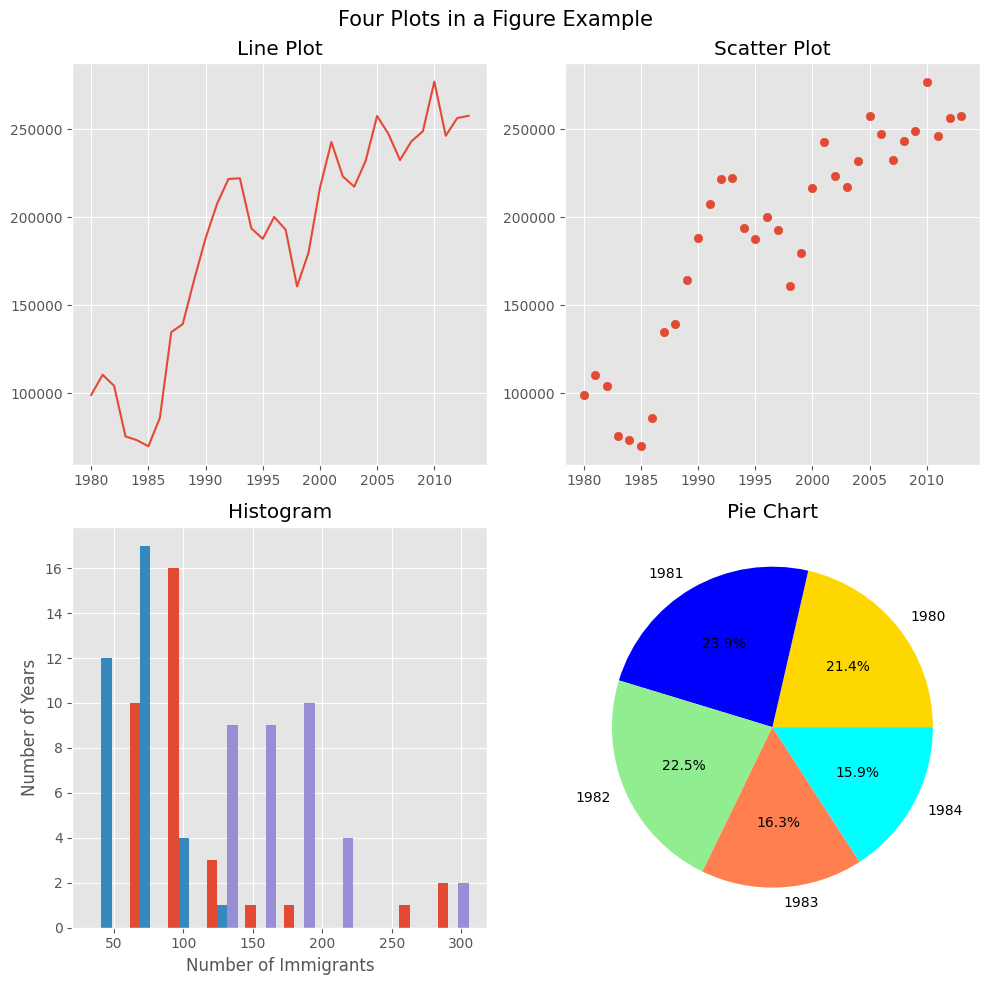

In [33]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(total_immigrants)
ax1.set_title("Line Plot")

ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(total_immigrants.index, total_immigrants)
ax2.set_title("Scatter Plot")

ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(df_DNS)
ax3.set_title("Histogram")
ax3.set_xlabel("Number of Immigrants")
ax3.set_ylabel("Number of Years")

ax4 = fig.add_subplot(2, 2, 4)
ax4.pie(total_immigrants[0: 5], labels=years[0: 5], colors=["gold", "blue", "lightgreen", "coral", "cyan"], autopct="%1.1f%%")
ax4.set_aspect("equal")
ax4.set_title("Pie Chart")

fig.suptitle("Four Plots in a Figure Example", fontsize=15)
fig.tight_layout()

****
This is the end of the file.
****